In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

In [76]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.image = np.zeros((H,W,3))
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.image = mpimg.imread(nomFichier)
            self.H = self.image.shape[1]
            self.W = self.image.shape[0]
     
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.image

    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''    
    def getCouleur(self,row, col):
        red   = self.getImg()[row, col, 0] # 0 est le rouge
        green = self.getImg()[row, col, 1]  # 1 est le vert
        blue  = self.getImg()[row, col, 2] 
        return [red, green, blue]
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        self.getImg()[row, col, 0] = couleur.getR()   
        self.getImg()[row, col, 1] = couleur.getG()
        self.getImg()[row, col, 2] = couleur.getB()
        return self.getImg()[row, col, 0], self.getImg()[row, col, 0], self.getImg()[row, col, 0] 
    ''''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.image, vmin = 0, vmax = 255)
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.image, format = 'png')

In [77]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel): # cette fonction ne fonctionne pas
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(path,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image[:, :])
        return grayPicture 
        
    '''
    
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    
    def transformGrayscaleGlouton(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        for i in range(grayPicture.H-1):
            for j in range(grayPicture.W-1):
                A = (0.299*self.image.image[i, j, 0] + 0.587*self.image.image[i, j, 1]
                               + 0.114*self.image.image[i, j, 2])
                grayPicture.image[i, j] = np.array([A, A, A]) # mettre chaque pixel en niveau de gris
        return grayPicture 
             
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        pass
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        imgrouge = Picture(None,self.image.W,self.image.H)
        imgvert = Picture(None,self.image.W,self.image.H)
        imgbleu = Picture(None,self.image.W,self.image.H)
        for i in range(imgrouge.H-1):
            for j in range(imgrouge.W-1):
                imgrouge.image[i, j] = np.array([self.image.image[i, j, 0], 0, 0])
                imgvert.image[i, j] = np.array([0, self.image.image[i, j, 1], 0])
                imgbleu.image[i, j] = np.array([0, 0, self.image.image[i, j, 2]])
        return imgrouge, imgvert, imgbleu
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        pass

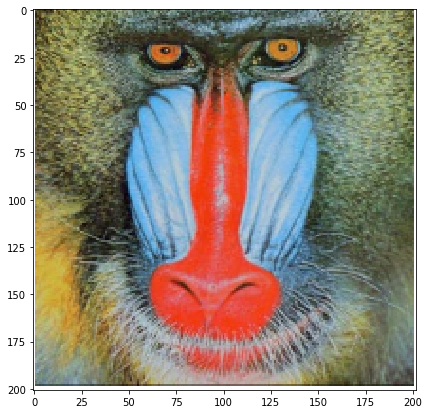

In [78]:
imge = Picture('laye.png') 
# affichage image
plt.figure(figsize=(7,7))
imge.affiche()


In [80]:
#getH()
print("retour de la hauteur H= ",imge.getH())

 
# getW()
print("retour de la largeur L= ",imge.getW())

#retour du tableau numpy
print('le tableau numpy constituant limage',imge.getImg())


retour de la hauteur H=  202
retour de la largeur L=  201
le tableau numpy constituant limage [[[1.         1.         1.         1.        ]
  [0.4117647  0.36078432 0.22745098 1.        ]
  [0.29411766 0.26666668 0.11372549 1.        ]
  ...
  [0.34509805 0.34117648 0.19607843 1.        ]
  [0.3254902  0.32156864 0.1764706  1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [0.28627452 0.24313726 0.10588235 1.        ]
  [0.4        0.3647059  0.20784314 1.        ]
  ...
  [0.32156864 0.32941177 0.1764706  1.        ]
  [0.5921569  0.6039216  0.44705883 1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [0.18039216 0.14117648 0.02745098 1.        ]
  [0.3764706  0.3372549  0.19215687 1.        ]
  ...
  [0.3647059  0.3764706  0.22352941 1.        ]
  [0.43529412 0.44705883 0.29411766 1.        ]
  [1.         1.         1.         1.        ]]

 ...

 [[1.       

(<matplotlib.axes._subplots.AxesSubplot at 0x7a01e5b9c8>,
 <matplotlib.image.AxesImage at 0x7a01e3f748>)

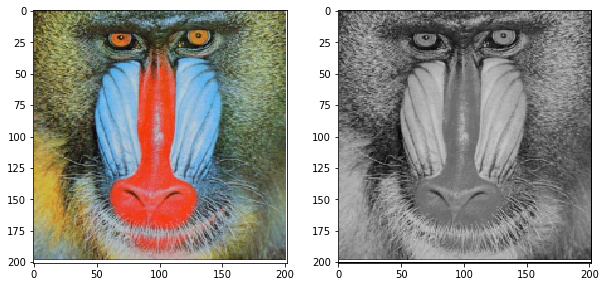

In [81]:

#ImageProcessing
laye1 = ImageProcessing(imge)
imageprocessing.image.image
#transformGrayscaleGlouton()
imgegray = imageprocessing.transformGrayscaleGlouton()
plt.figure(figsize =(10, 10))
plt.subplot(121), plt.imshow(imge.image)
plt.subplot(122), plt.imshow(imgegray.image)

(<matplotlib.axes._subplots.AxesSubplot at 0x7a00281688>,
 <matplotlib.image.AxesImage at 0x7a00266988>)

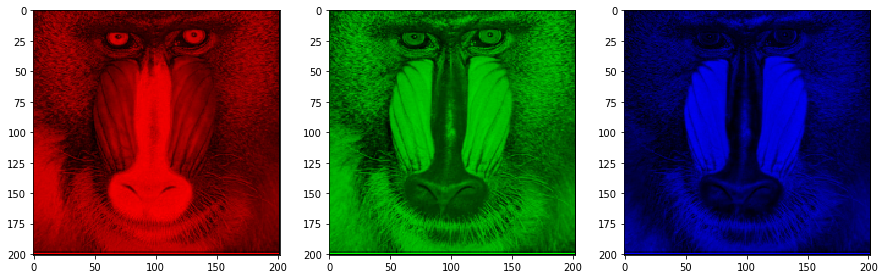

In [82]:
imgrouge, imgvert, imgbleu = imageprocessing.separerCouleur()
plt.figure(figsize =(15, 15))
plt.subplot(131), plt.imshow(imgrouge.image)
plt.subplot(132), plt.imshow(imgvert.image)
plt.subplot(133), plt.imshow(imgbleu.image)

